In [159]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [160]:
ratings = pd.read_csv('data/rating.csv')
ratings.head()

,id,user_id,product_id,rating,created_at,updated_at
0,1,1,5,5.0,2023-10-14 15:53:20,2023-10-14 15:53:20
1,2,1,17,2.0,2023-10-14 15:53:47,2023-10-14 15:53:47
2,3,1,1,4.5,2023-10-14 15:54:37,2023-10-14 15:54:37
3,4,4,21,4.0,2023-10-14 15:56:24,2023-10-14 15:56:24
4,5,2,3,3.0,2023-10-14 15:57:40,2023-10-14 15:57:40


In [161]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          455 non-null    int64  
 1   user_id     455 non-null    int64  
 2   product_id  455 non-null    int64  
 3   rating      455 non-null    float64
 4   created_at  455 non-null    object 
 5   updated_at  455 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 21.5+ KB


In [162]:
ratings = ratings[['id', 'user_id', 'product_id', 'rating']]
ratings.head()

,id,user_id,product_id,rating
0,1,1,5,5.0
1,2,1,17,2.0
2,3,1,1,4.5
3,4,4,21,4.0
4,5,2,3,3.0


In [163]:
# number user rating
print('Rating dataset memiliki', ratings['user_id'].nunique(), 'unik user')

print('Rating dataset memiliki', ratings['product_id'].nunique(), 'unik produk')

print('Rating dataset memiliki', ratings['rating'].nunique(), 'rating user')

print('The unique ratings are', sorted(ratings['rating'].unique()))

Rating dataset memiliki 119 unik user
Rating dataset memiliki 30 unik produk
Rating dataset memiliki 8 rating user
The unique ratings are [1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [164]:
products = pd.read_csv('data/products.csv')
products.head()

,id,name,description,image,price,weigth,categories_id,created_at,updated_at,stok
0,1,Sistem Keuangan,-,imageproduct/ayeuVUSTTyRKGTH0FHlz1nE1WrNBBLq8W...,15000000,0,1,2023-10-02 04:58:19,2023-10-02 04:58:19,100
1,2,Sistem Penjaminan Mutu,-,imageproduct/Qbn54KgkBPtnDr0ASoTmFaKf5We7orwlj...,10000000,0,1,2023-10-02 04:58:49,2023-10-02 04:58:49,100
2,3,Digital Librari,-,imageproduct/oycPzvgAOyoMStS8NMxHvLPy6kr8WfGjB...,7000000,0,1,2023-10-02 05:15:08,2023-10-02 05:15:08,1000
3,4,E-Fakultas,-,imageproduct/9flpnfbFmGqD9R2WIX7Lp2FvK7wPWD48X...,50000000,0,1,2023-10-02 05:51:37,2023-10-02 05:51:37,0
4,5,Motherboard,-,imageproduct/P5h1UgS9MVMhPMbAyle5saT5vzyCzP6df...,2000000,1000,2,2023-10-14 07:09:38,2023-10-14 07:09:38,100


In [165]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             30 non-null     int64 
 1   name           30 non-null     object
 2   description    30 non-null     object
 3   image          30 non-null     object
 4   price          30 non-null     int64 
 5   weigth         30 non-null     int64 
 6   categories_id  30 non-null     int64 
 7   created_at     30 non-null     object
 8   updated_at     30 non-null     object
 9   stok           30 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 2.5+ KB


In [166]:
products = products[['id', 'name', 'categories_id']]
products.head()

,id,name,categories_id
0,1,Sistem Keuangan,1
1,2,Sistem Penjaminan Mutu,1
2,3,Digital Librari,1
3,4,E-Fakultas,1
4,5,Motherboard,2


In [167]:
products.rename(columns={
    'id': 'product_id'
}, inplace=True)

In [168]:
df = pd.merge(ratings, products, on='product_id', how='inner')

df.head()

,id,user_id,product_id,rating,name,categories_id
0,1,1,5,5.0,Motherboard,2
1,35,10,5,3.0,Motherboard,2
2,43,12,5,5.0,Motherboard,2
3,73,19,5,3.0,Motherboard,2
4,91,24,5,3.5,Motherboard,2


In [169]:
agg_ratings = df.groupby('name').agg(mean_rating = ('rating', 'mean'), 
                                      number_of_ratings = ('rating', 'count')).reset_index()

agg_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               30 non-null     object 
 1   mean_rating        30 non-null     float64
 2   number_of_ratings  30 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [170]:
agg_ratings.sort_values(by='number_of_ratings', ascending=False).tail()

,name,mean_rating,number_of_ratings
7,Desain Motion Graphics.,3.750000,10
13,Intel Motheboard ASUS LGA 1150 Mini-ITX,4.000000,10
24,Sistem Pendaftaran Mahasiswa,3.850000,10
8,Desain Paket (Packaging Design),3.611111,9
26,Sistem Recomendasi,4.375000,8


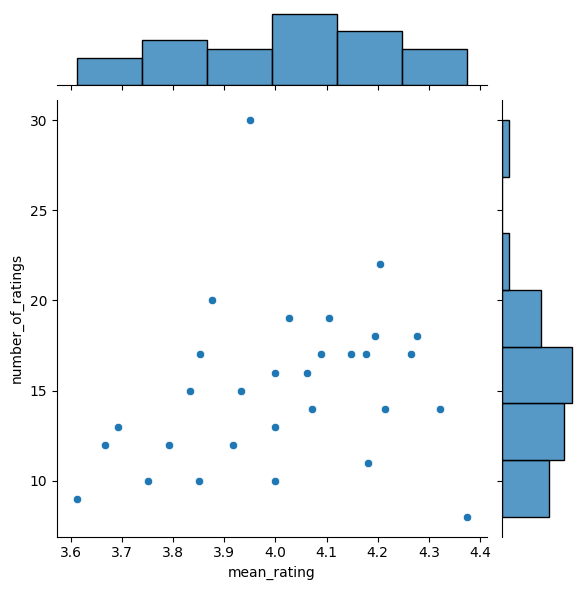

In [171]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings)

In [172]:
# merge data
df_merge = pd.merge(df, agg_ratings[['name']], on='name', how='inner')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             455 non-null    int64  
 1   user_id        455 non-null    int64  
 2   product_id     455 non-null    int64  
 3   rating         455 non-null    float64
 4   name           455 non-null    object 
 5   categories_id  455 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 21.5+ KB


In [173]:
# create user matrix
matrix = df_merge.pivot_table(index='name', columns='user_id', values='rating')
matrix.fillna(0, inplace=True)
matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,110,111,112,113,114,115,116,117,118,119
name,,,,,,,,,,,,,,,,,,,,,
CPU Rizen,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
Desain Banner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
Desain Event Stage,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Desain Identitas Perusahaan (Corporate Identity Design),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,4.0,4.5,3.5,0.0,5.0,0.0,0.0,0.0,0.0,0.0
Desain Iklan (Advertising Design),0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
# data nornalisasi
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis=0)
matrix_norm.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,110,111,112,113,114,115,116,117,118,119
name,,,,,,,,,,,,,,,,,,,,,
CPU Rizen,-0.596639,-0.596639,2.403361,-0.596639,-0.596639,-0.596639,-0.596639,-0.596639,-0.596639,-0.596639,...,2.903361,-0.596639,4.403361,-0.596639,4.403361,-0.596639,-0.596639,4.403361,-0.596639,-0.596639
Desain Banner,-0.647059,-0.647059,-0.647059,-0.647059,-0.647059,-0.647059,-0.647059,-0.647059,-0.647059,-0.647059,...,-0.647059,-0.647059,-0.647059,-0.647059,-0.647059,-0.647059,-0.647059,4.352941,-0.647059,-0.647059
Desain Event Stage,-0.369748,-0.369748,-0.369748,-0.369748,2.130252,-0.369748,-0.369748,-0.369748,-0.369748,-0.369748,...,3.130252,-0.369748,-0.369748,-0.369748,-0.369748,-0.369748,-0.369748,-0.369748,-0.369748,-0.369748
Desain Identitas Perusahaan (Corporate Identity Design),-0.609244,-0.609244,-0.609244,-0.609244,-0.609244,-0.609244,-0.609244,-0.609244,3.390756,-0.609244,...,3.390756,3.890756,2.890756,-0.609244,4.390756,-0.609244,-0.609244,-0.609244,-0.609244,-0.609244
Desain Iklan (Advertising Design),-0.592437,-0.592437,2.407563,-0.592437,-0.592437,-0.592437,-0.592437,-0.592437,-0.592437,-0.592437,...,-0.592437,-0.592437,-0.592437,-0.592437,-0.592437,-0.592437,-0.592437,-0.592437,-0.592437,-0.592437


In [175]:
# calculate similarity
item_similarity = matrix_norm.T.corr()
item_similarity

name,CPU Rizen,Desain Banner,Desain Event Stage,Desain Identitas Perusahaan (Corporate Identity Design),Desain Iklan (Advertising Design),Desain Ilustrasi (Illustration Design),Desain Logo,Desain Motion Graphics.,Desain Paket (Packaging Design),Desain Tipografi (Typography Design),...,RAM Kingstons HyperrX,SSD Samsung,Sistem Akademik,Sistem Keuangan,Sistem Pendaftaran Mahasiswa,Sistem Penjaminan Mutu,Sistem Recomendasi,V Series SSD,VGA Full,Website dan UI/UX
name,,,,,,,,,,,,,,,,,,,,,
CPU Rizen,1.000000,0.096181,-0.029406,0.094165,0.056046,-0.131702,0.151440,-0.035416,0.029722,0.041867,...,-0.109432,-0.160514,-0.077536,-0.032888,-0.015459,0.071505,0.123148,0.064229,-0.064540,-0.074130
Desain Banner,0.096181,1.000000,-0.133423,-0.103162,0.014172,0.074524,-0.098317,0.048512,-0.058591,-0.002775,...,0.030171,-0.033216,-0.021763,-0.031762,-0.044362,0.073100,-0.110615,0.178707,-0.150143,-0.031316
Desain Event Stage,-0.029406,-0.133423,1.000000,0.010587,0.068803,-0.049117,0.007892,-0.095936,-0.037766,0.003513,...,-0.083996,-0.128725,-0.108659,0.047269,0.087646,-0.009128,-0.019434,0.090572,-0.053805,0.081754
Desain Identitas Perusahaan (Corporate Identity Design),0.094165,-0.103162,0.010587,1.000000,-0.011098,-0.132507,0.010786,-0.120358,-0.113491,0.080067,...,-0.098129,0.205605,-0.071059,-0.126212,-0.017720,-0.080505,0.202130,0.010140,-0.046851,-0.094726
Desain Iklan (Advertising Design),0.056046,0.014172,0.068803,-0.011098,1.000000,-0.046240,-0.171157,-0.119730,-0.051331,-0.014741,...,0.071634,0.018828,0.095676,-0.042625,-0.014734,0.097003,-0.034665,-0.082997,-0.144856,-0.073538
Desain Ilustrasi (Illustration Design),-0.131702,0.074524,-0.049117,-0.132507,-0.046240,1.000000,-0.140435,-0.098239,-0.092634,-0.039734,...,-0.053946,-0.062370,0.146396,-0.021017,-0.098167,0.120748,-0.087564,0.131451,0.084098,0.070524
Desain Logo,0.151440,-0.098317,0.007892,0.010786,-0.171157,-0.140435,1.000000,0.041102,-0.077934,-0.040865,...,-0.018631,-0.118557,-0.068708,-0.045035,0.074578,-0.111287,-0.052986,-0.146797,-0.057035,-0.068151
Desain Motion Graphics.,-0.035416,0.048512,-0.095936,-0.120358,-0.119730,-0.098239,0.041102,1.000000,0.117141,-0.139998,...,-0.025159,-0.045928,-0.101066,0.003255,-0.089167,-0.119654,-0.079536,-0.102689,0.108636,-0.042000
Desain Paket (Packaging Design),0.029722,-0.058591,-0.037766,-0.113491,-0.051331,-0.092634,-0.077934,0.117141,1.000000,-0.132010,...,-0.104343,0.114611,-0.077126,0.053987,0.027870,0.014893,0.062306,-0.004784,0.106134,-0.067446


In [176]:
# Item similarity matrix using cosine similarity
item_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
item_similarity_cosine

array([[ 1.00000000e+00,  9.61805283e-02, -2.94055056e-02,
         9.41648481e-02,  5.60458850e-02, -1.31701979e-01,
         1.51440079e-01, -3.54163092e-02,  2.97218714e-02,
         4.18667593e-02, -1.20515990e-01, -8.25554092e-02,
        -4.23284095e-02, -4.36667831e-02, -8.68303405e-02,
        -3.22711046e-02, -6.21160725e-02, -1.30972742e-01,
         6.82626310e-02, -9.49426066e-02, -1.09431779e-01,
        -1.60513755e-01, -7.75364489e-02, -3.28879188e-02,
        -1.54590224e-02,  7.15051397e-02,  1.23147854e-01,
         6.42291638e-02, -6.45403783e-02, -7.41302053e-02],
       [ 9.61805283e-02,  1.00000000e+00, -1.33423427e-01,
        -1.03162233e-01,  1.41715282e-02,  7.45235490e-02,
        -9.83166510e-02,  4.85117981e-02, -5.85914075e-02,
        -2.77464900e-03,  1.64965094e-02, -3.56163707e-02,
         9.34673685e-02, -2.77145012e-02, -1.06847279e-01,
        -5.99133670e-03, -8.08163214e-02, -8.73414154e-02,
        -7.83837679e-03, -8.41220332e-02,  3.01710625e-

In [197]:
# predict
picked_userid =2

picked_prroduct = 'Sistem Recomendasi'

picked_userid_buy = pd.DataFrame(matrix_norm[picked_userid].dropna(axis=0, how='all').sort_values(ascending=False)).reset_index().rename(columns={1:'rating'})

picked_userid_buy

,name,2
0,Website dan UI/UX,2.865546
1,Desain Logo,2.344538
2,Desain Paket (Packaging Design),2.226891
3,Digital Librari,2.004202
4,Sistem Akademik,0.596639
5,Sistem Recomendasi,-0.294118
6,Desain Motion Graphics.,-0.315126
7,Sistem Pendaftaran Mahasiswa,-0.323529
8,Intel Motheboard ASUS LGA 1150 Mini-ITX,-0.336134
9,Desain Event Stage,-0.369748


In [198]:
# Similarity score of the movie Sistem Akademik with all the other movies
picked_product_similarity_score = item_similarity[[picked_prroduct]].reset_index().rename(columns={'Sistem Recomendasi': 'similarity_score'})

n = 30

picked_userid_buy_similarity = pd.merge(left=picked_userid_buy, right=picked_product_similarity_score, on='name', how='inner')\
.sort_values('similarity_score', ascending=False)[:n]

picked_userid_buy_similarity

,name,2,similarity_score
5,Sistem Recomendasi,-0.294118,1.000000
25,Desain Identitas Perusahaan (Corporate Identit...,-0.609244,0.202130
24,CPU Rizen,-0.596639,0.123148
21,Sistem Penjaminan Mutu,-0.550420,0.092649
2,Desain Paket (Packaging Design),2.226891,0.062306
8,Intel Motheboard ASUS LGA 1150 Mini-ITX,-0.336134,0.038100
22,SSD Samsung,-0.584034,0.030327
16,Monitor AOC E2270swdn Full HD,-0.495798,0.028366
17,PC,-0.495798,0.000844
0,Website dan UI/UX,2.865546,-0.009755


In [179]:
# Item-based recommendation function
def item_based_rec(picked_userid=1, number_of_similar_items=5, number_of_recommendations =3):
  import operator
  # Movies that the target user has not watched
  picked_userid_unwatched = pd.DataFrame(matrix_norm[picked_userid].isna()).reset_index()
  picked_userid_unwatched = picked_userid_unwatched[picked_userid_unwatched[1]==True]['name'].values.tolist()

  # Movies that the target user has watched
  picked_userid_watched = pd.DataFrame(matrix_norm[picked_userid].dropna(axis=0, how='all')\
                            .sort_values(ascending=False))\
                            .reset_index()\
                            .rename(columns={1:'rating'})

  # Dictionary to save the unwatched movie and predicted rating pair
  rating_prediction ={}

  # Loop through unwatched movies
  for picked_movie in picked_userid_unwatched:
    # Calculate the similarity score of the picked movie iwth other movies
    picked_movie_similarity_score = item_similarity[[picked_movie]].reset_index().rename(columns={picked_movie:'similarity_score'})
    # Rank the similarities between the picked user watched movie and the picked unwatched movie.
    picked_userid_watched_similarity = pd.merge(left=picked_userid_watched,
                                                right=picked_movie_similarity_score,
                                                on='name',
                                                how='inner')\
                                        .sort_values('similarity_score', ascending=False)[:number_of_similar_items]
    # Calculate the predicted rating using weighted average of similarity scores and the ratings from user 1
    predicted_rating = round(np.average(picked_userid_watched_similarity['rating'],
                                        weights=picked_userid_watched_similarity['similarity_score']), 6)
    # Save the predicted rating in the dictionary
    rating_prediction[picked_movie] = predicted_rating
    # Return the top recommended movies
  return sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:number_of_recommendations]

# Get recommendations
recommended_movie = item_based_rec(picked_userid=1, number_of_similar_items=5, number_of_recommendations =3)
recommended_movie

[]